# Random Solver
A implemenation which takes the solvers and the roblem instance then tends to act randomly. It is a good baseline to compare with other solvers.

## Imports all the Libraries
Importing all the libraries which are required for the implementation.

In [1]:
import random
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from time import time


## Accessing the Data (Openning it from the CSV file) (Redo of the data_analysis.ipynb)
Checking if the data is loaded correctly, and all the files are there or not.

In [2]:
problems_files = glob.glob('data/*.tsp')
problems = []
for prob in problems_files:
    problems.append(prob[5:])
    #print(prob[5:])

print(problems)

print(len(problems) == 10)


['ch130.tsp', 'd198.tsp', 'eil76.tsp', 'fl1577.tsp', 'kroA100.tsp', 'lin318.tsp', 'pcb442.tsp', 'pr439.tsp', 'rat783.tsp', 'u1060.tsp']
True


## Finding the Euclidean Distance
The distance between points for the edges weights. The distance between two points is the square root of the sum of the squares of the differences of the coordinates.

In [3]:
def euclidean_distance(point_i, point_j):
    rouding = 0
    x_i, y_i = point_i[0], point_i[1]
    x_j, y_j = point_j[0], point_j[1]
    distance = np.sqrt((x_i - x_j)**2 + (y_i - y_j)**2)
    return round(distance, rouding)

point_1 = (2, 2)
point_2 = (5, 5)
print(euclidean_distance(point_1, point_2))

4.0


## Reading the Data and Creating the Graph
Reading the data from the CSV file and creating the graph. The graph is created using the networkx library.

In [4]:
class CreatingGraph:
    def __init__(self, problem):
        self.problem = problem
        #self.graph = self.create_graph()

        # reading the raw data from the file
        with open (problem) as f:
            data = f.read()
            self.lines = data.splitlines()

        
        self.name = self.lines[0].split()[1]
        self.type = self.lines[1].split()[1]
        self.dimension = int(self.lines[3].split(' ')[2])
        #self.edge_weight_type = self.lines[4].split()[2]

        self.best_known = float(self.lines[5].split()[2])

        self.point = np.zeros((self.dimension, 3))
        self.distance_matrix = None
        for i in range(self.dimension):
            lines_i = self.lines[i+7].split(' ')
            self.point[i, 0] = int(lines_i[0])
            self.point[i, 1] = float(lines_i[1])
            self.point[i, 2] = float(lines_i[2])
        
        #Creating the Distance Matrix of all the points
        self.distance_matrix = np.zeros((int(self.dimension), int(self.dimension)))
        for i in range(self.dimension):
            for j in range(i, self.dimension):
                self.distance_matrix[i, j] = euclidean_distance(self.point[i][1:3], self.point[j][1:3])
            self.distance_matrix += self.distance_matrix.T
        


    
    def print_metatdata(self):
        print("----------------------------------\n")
        print("Name: ", self.name)
        print("Type: ", self.type)
        print("Dimension: ", self.dimension)
         #print("Edge Weight Type: ", self.edge_weight_type)
        print("Best Known: ", self.best_known)
        print("Distance Matrix: ", self.distance_matrix)
        print("----------------------------------")
        print(self.distance_matrix[0][1])
    
    def plor_data(self):
        plt.scatter(self.point[:,1], self.point[:,2])
        plt.show()

 

## Testing out the Graph
Testing out the graph by printing the nodes and seeing if all the retrieval is fine or not.

----------------------------------

Name:  :
Type:  :
Dimension:  76
Best Known:  538.0
Distance Matrix:  [[0.00000000e+00 5.66683978e+23 8.68915433e+23 ... 6.80020774e+23
  8.68915433e+23 9.44473297e+23]
 [5.66683978e+23 0.00000000e+00 4.53347182e+23 ... 1.32226262e+23
  2.26673591e+23 2.83341989e+23]
 [8.68915433e+23 4.53347182e+23 0.00000000e+00 ... 2.92786722e+23
  1.98339392e+23 1.88894659e+23]
 ...
 [6.80020774e+23 1.32226262e+23 2.92786722e+23 ... 0.00000000e+00
  6.80000000e+01 8.00000000e+01]
 [8.68915433e+23 2.26673591e+23 1.98339392e+23 ... 6.80000000e+01
  0.00000000e+00 6.00000000e+00]
 [9.44473297e+23 2.83341989e+23 1.88894659e+23 ... 8.00000000e+01
  6.00000000e+00 0.00000000e+00]]
----------------------------------
5.666839779443574e+23


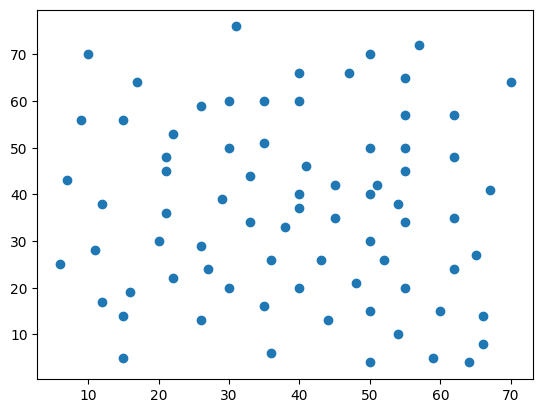

In [5]:
example_problem = "data/eil76.tsp"
problem_instance = CreatingGraph(example_problem)
CreatingGraph(example_problem).print_metatdata()
CreatingGraph(example_problem).plor_data()

## Creating the Random Solver

In [6]:
def random_solver(problem):
    return np.random.choice(np.arange(problem.dimension), size=problem.dimension, replace=False)
available_methods = {"random": random_solver}


In [7]:
len(random_solver(problem_instance))
problem_instance.dimension
print(random_solver(problem_instance))

[35 61 56 48 23  3 60 10 39 20 72 37  9 40 71 49 70 45 54 73 66 13 34 57
 30 22 15 63 24 33 43 11 26 38 25 50 14 18 47 53  2 44 32 55 16 65  1 28
 21 29  8 12  5 67 46  0 36  4 31 68 19 58 69  6 62 64 52 59 17  7 27 42
 74 51 41 75]


## Debugging the Random Solver

Solution:  None
Cost:  3.724083888571891e+24
Gap:  6.922089012215411e+23
Best Known:  538.0


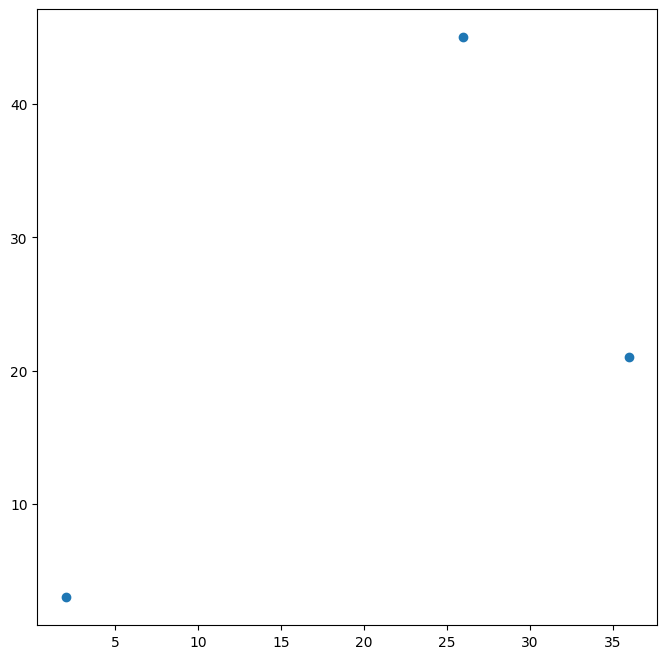

In [8]:
class debugg_solver:
   def __init__(self, problem, method):
        self.problem = problem
        self.method = method
        self.solution = self.compute_solution()
        self.found_length = np.inf #np.inf is a constant representing infinity
        #self.cost = self.calculate_cost()

   def compute_solution(self):
      self.solution = available_methods[self.method](self.problem)
      assert len(self.solution) == self.problem.dimension, "Solution length is not equal to the problem dimension"
      self.evaluate_solution()
      self.cost = self.calculate_cost()
      self.gap = self.calculate_gap()
   
   def evaluate_solution(self):
      total_distance = 0
      starting_node = self.solution[0]
      for node_id in self.solution[1:]:
         edge_distance = self.problem.distance_matrix[starting_node, node_id]
         total_distance += edge_distance
         starting_node = node_id
      self.found_length = total_distance + self.problem.distance_matrix[starting_node, self.solution[0]]
      return self.found_length
   
   def calculate_cost(self):
      cost = 0
      for i in range(self.problem.dimension - 1):
         cost += self.problem.distance_matrix[self.solution[i]][self.solution[i+1]]
      cost += self.problem.distance_matrix[self.solution[self.problem.dimension - 1]][self.solution[0]]
      return cost
   
   def calculate_gap(self):
      return (self.found_length - self.problem.best_known) / self.problem.best_known * 100
   
   def print_solution(self):
      print("Solution: ", self.solution)
      print("Cost: ", self.cost)
      print("Gap: ", self.gap)
      print("Best Known: ", self.problem.best_known)
   
   def plot_solution(self):
      plt.figure(figsize=(8,8))
      ordered_points = self.problem.point[self.solution]
      plt.scatter(ordered_points[:,1], ordered_points[:,2])
      plt.plot(ordered_points[:,1], ordered_points[:,2], color='red')
      plt.show()

debugg_solver = debugg_solver(problem_instance, "random")
debugg_solver.print_solution()
debugg_solver.plot_solution()